# Exploratory data analysis of SpaceX Missions 

## Load libraries and data

In [1]:
%matplotlib inline
import pandas as pd
import numpy
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('spacex-mission.csv')
data.head(5)

,Flight Number,Launch Date,Launch Time,Launch Site,Vehicle Type,Payload Name,Payload Type,Payload Mass (kg),Payload Orbit,Customer Name,Customer Type,Customer Country,Mission Outcome,Failure Reason,Landing Type,Landing Outcome
0,F1-1,24 March 2006,22:30,Marshall Islands,Falcon 1,FalconSAT-2,Research Satellite,19.5,NaN,DARPA,Government,United States,Failure,Engine Fire During Launch,NaN,NaN
1,F1-2,21 March 2007,01:10,Marshall Islands,Falcon 1,DemoSat,NaN,NaN,NaN,DARPA,Government,United States,Failure,Engine Shutdown During Launch,NaN,NaN
2,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Trailblazer,Communication Satellite,NaN,NaN,ORS,Government,United States,Failure,Collision During Launch,NaN,NaN
3,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,"PRESat, NanoSail-D",Research Satellites,8.0,NaN,NASA,Government,United States,Failure,Collision During Launch,NaN,NaN
4,F1-3,3 August 2008,03:34,Marshall Islands,Falcon 1,Explorers,Human Remains,NaN,NaN,Celestis,Business,United States,Failure,Collision During Launch,NaN,NaN


In [3]:
data.shape

(41, 16)

In [4]:
# Count NaN in each column
data.isnull().sum()

Flight Number         0
Launch Date           0
Launch Time           0
Launch Site           0
Vehicle Type          0
Payload Name          0
Payload Type          3
Payload Mass (kg)     8
Payload Orbit         5
Customer Name         2
Customer Type         2
Customer Country      2
Mission Outcome       0
Failure Reason       33
Landing Type         13
Landing Outcome      20
dtype: int64

In [5]:
# Deal with the date
import calendar
import time
import datetime

month = {v: k for k,v in enumerate(calendar.month_name)}

def dateToTimestamp(d):
    t = d.split()
    d = '{0}/{1}/{2}'.format(month[t[1]], t[0], t[2])
    return time.mktime(datetime.datetime.strptime(d, "%m/%d/%Y").timetuple())

data['timestamp'] = data['Launch Date'].apply(dateToTimestamp)

In [6]:
# Create a function to plot some information vs time
def myFormatter(x, pos):
    return datetime.datetime.fromtimestamp(x).strftime('%Y-%m')

def plotOverTime(col):
    plt.figure(figsize=(10,5))
    ax = sns.swarmplot(x="timestamp", y=col, data=data)
    ax.xaxis.set_major_formatter(matplotlib.ticker.FuncFormatter(myFormatter))
    ax.set(xlabel='Date')

## Exploratory data analysis

Cape Canaveral AFS LC-40       30
Marshall Islands                7
Vandenberg AFB SLC-4E           3
Kennedy Space Center LC-39A     1
Name: Launch Site, dtype: int64

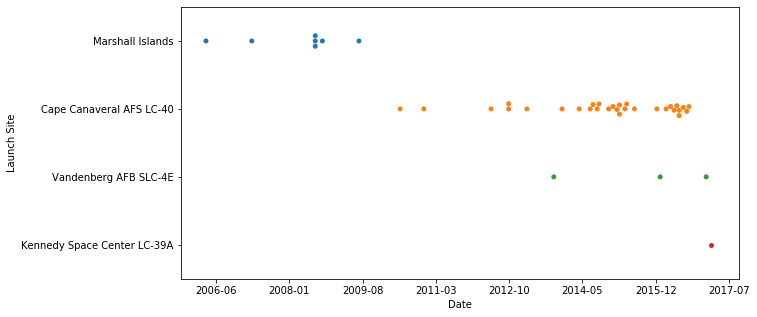

In [7]:
# Launch sites
plotOverTime('Launch Site')
data['Launch Site'].value_counts()

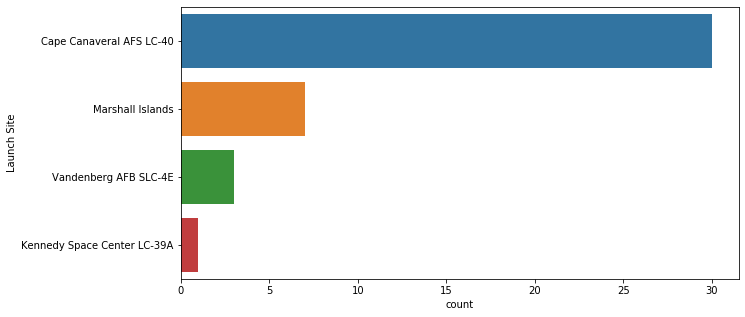

In [8]:
plt.figure(figsize=(10,5))
sns.countplot(y = data['Launch Site'], order = data['Launch Site'].value_counts().index)
plt.show()

NASA                        13
Orbcomm                      3
Eutelsat (Satmex)            2
SES                          2
Thaicom                      2
DARPA                        2
SKY Perfect JSAT Group       2
Asia Broadcast Satellite     2
AsiaSat                      2
Spacecom                     1
ATSB                         1
NASA; NOAA; CNES             1
Iridium Communications       1
MDA Corp                     1
Celestis                     1
ORS                          1
US Air Force; NASA; NOAA     1
Turkmenistan NSA             1
Name: Customer Name, dtype: int64

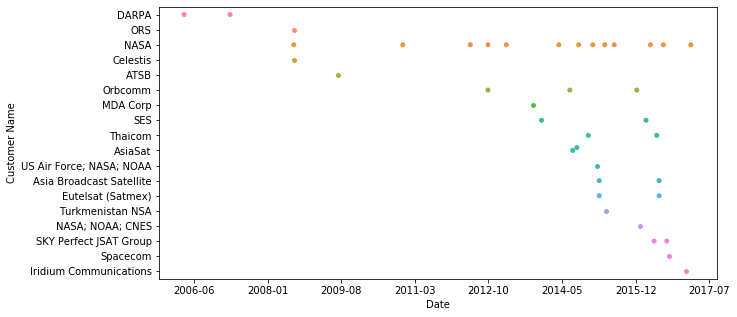

In [9]:
# Customer Name
plotOverTime('Customer Name')
data['Customer Name'].value_counts()

Government    20
Business      19
Name: Customer Type, dtype: int64

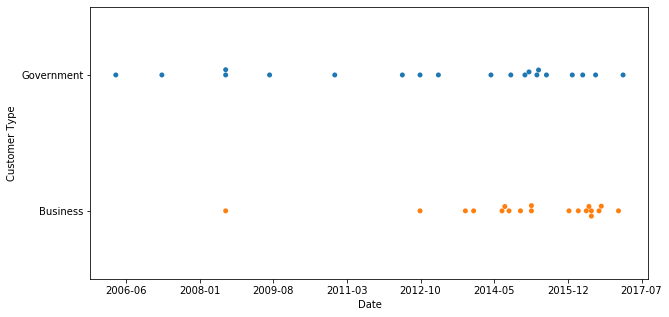

In [10]:
# Customer type
plotOverTime('Customer Type')
data['Customer Type'].value_counts()

United States      23
France (Mexico)     2
China               2
Thailand            2
Luxembourg          2
Bermuda             2
Japan               2
Turkmenistan        1
Canada              1
Israel              1
Malaysia            1
Name: Customer Country, dtype: int64

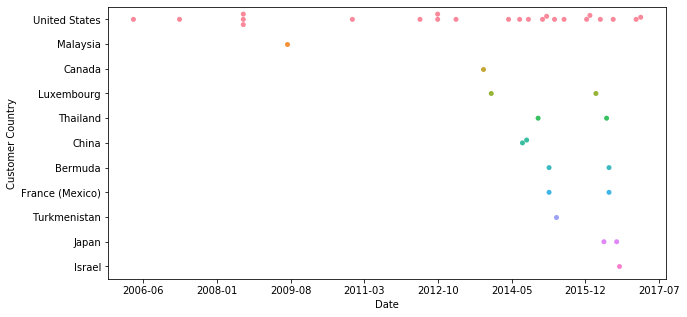

In [11]:
# Customer country
plotOverTime('Customer Country')
data['Customer Country'].value_counts()

Falcon 9 (v1.1)                16
Falcon 9 Full Thrust (v1.2)    12
Falcon 1                        7
Falcon 9 (v1.0)                 6
Name: Vehicle Type, dtype: int64

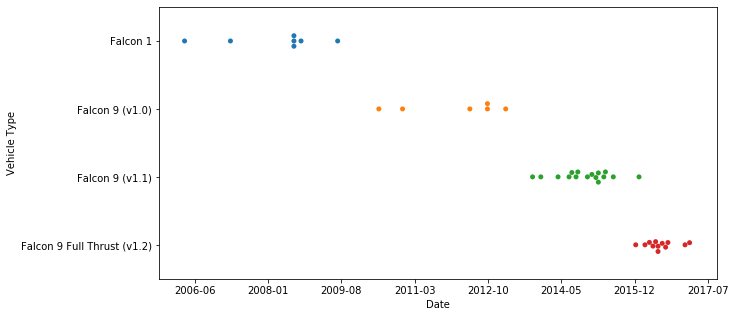

In [12]:
# Vehicle type
plotOverTime('Vehicle Type')
data['Vehicle Type'].value_counts()

Low Earth Orbit                 19
Geostationary Transfer Orbit    15
Polar Orbit                      1
Sun/Earth Orbit                  1
Name: Payload Orbit, dtype: int64

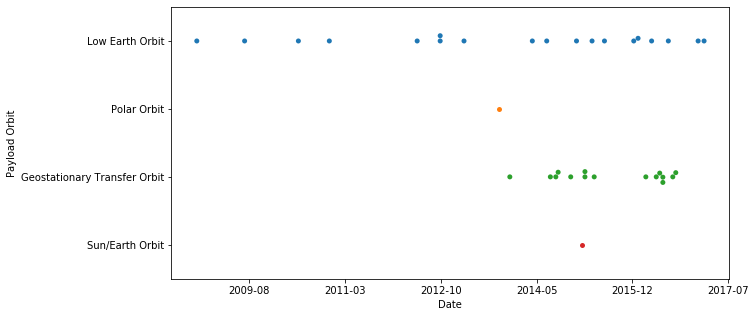

In [13]:
# Payload orbit
plotOverTime('Payload Orbit')
data['Payload Orbit'].value_counts()

Success    33
Failure     8
Name: Mission Outcome, dtype: int64

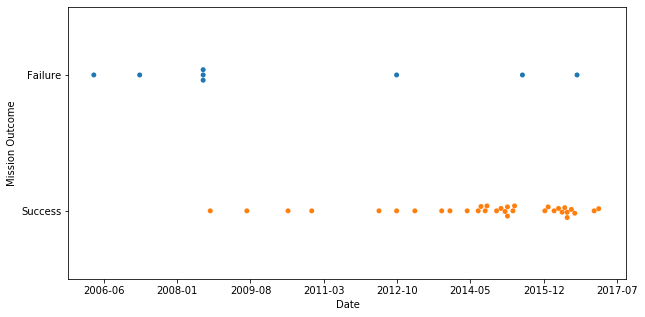

In [14]:
# Mission outcome
plotOverTime('Mission Outcome')
data['Mission Outcome'].value_counts()

Ship         11
None          7
Ocean         5
Land          3
Parachute     2
Name: Landing Type, dtype: int64

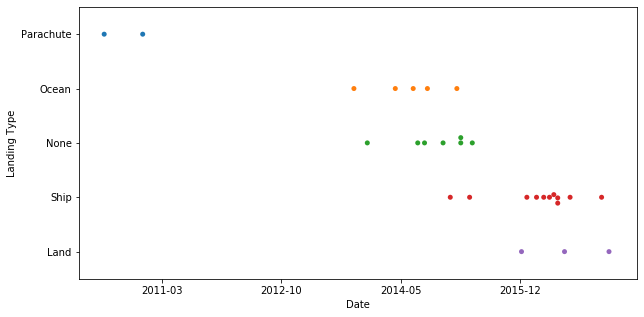

In [15]:
# Landing Type
plotOverTime('Landing Type')
data['Landing Type'].value_counts()

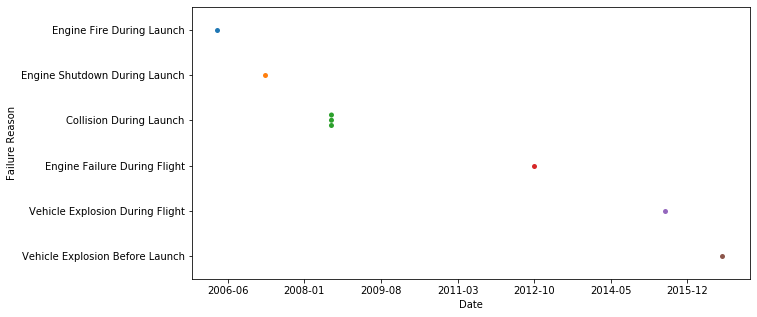

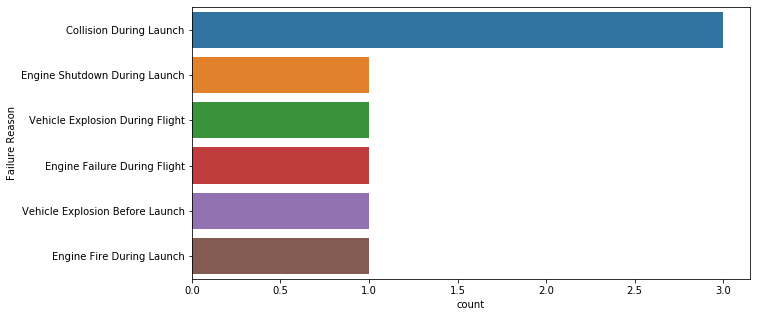

In [16]:
# Failure Reason
plotOverTime('Failure Reason')
plt.figure(figsize=(10,5))
sns.countplot(y = data['Failure Reason'], order = data['Failure Reason'].value_counts().index)
plt.show()